# Pipeline Analysis for Projects

In [1]:
import re
import time

import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Read CSV

In [2]:
#covert a string that is camelcase into snake_case
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def read(file_name):
    if not os.path.isfile(file_name):
        raise ValueError('File Not Found')
        
    ext = file_name.split('.')[-1].lower()
    if 'csv' == ext:
        df = pd.read_csv(file_name)
    elif 'xls' in ext:
        df = pd.read_excel(file_name)
    elif 'json' == ext:
        df = pd.read_json(file_name)
    else:
        raise ValueError('Only support csv, xls and json')

    return df

## Merge on projectid

In [3]:
df_project = pd.read_csv('projects.csv', index_col='projectid')
df_outcome = pd.read_csv('outcomes.csv', index_col='projectid')
df_donation = pd.read_csv('donations.csv', index_col='projectid')
df_resource = pd.read_csv('resources.csv', index_col='projectid')

In [4]:
df_origin = df_project.join(df_outcome)
df_origin = df_origin.join(df_donation)
df_origin = df_origin.join(df_resource)
df_origin.columns = [camel_to_snake(col) for col in df_origin.columns]
df_origin.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,for_honoree,donation_message,resourceid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,b3af2be825736f6d530314ae70e7c16c,767.0,Lakeshore Learning Materials,Supplies,CG582 - Adjustable Apron - Red,CG582,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,72f084e8c03ce9b3eff6e59de0476ef8,767.0,Lakeshore Learning Materials,Supplies,FF534 - Tissue Paper Squares,FF534,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,c2ea7ecbc583410fcec74c87ff102299,767.0,Lakeshore Learning Materials,Supplies,LM941 - Kid Counters,LM941,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,06d48fb6646b17eea8dd7e5fdd9a6178,767.0,Lakeshore Learning Materials,Supplies,LC987 - Newsprint Easel Paper - 16&amp;#34; x ...,LC987,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,aac3650483a9c0a6614ebccc6c6ced90,767.0,Lakeshore Learning Materials,Supplies,LA743 - Glitter Pack - Set of 12,LA743,12.99,2.0


# Explore Data

## Basic info

In [5]:
df = df_origin.sample(n=200000)
df.count()

teacher_acctid                              200000
schoolid                                    200000
school_ncesid                               184301
school_latitude                             200000
school_longitude                            200000
school_city                                 200000
school_state                                200000
school_zip                                  200000
school_metro                                177559
school_district                             199705
school_county                               200000
school_charter                              200000
school_magnet                               200000
school_year_round                           200000
school_nlns                                 200000
school_kipp                                 200000
school_charter_ready_promise                200000
teacher_prefix                              200000
teacher_teach_for_america                   200000
teacher_ny_teaching_fellow     

## Missing Data

In [6]:
# figure out which variables contain null values. 
# First, melt our data into long format.
# print a table telling the no of null and non-null instances.
df_lng = pd.melt(df)
null_variables = df_lng.value.isnull()
pd.crosstab(df_lng.variable, null_variables)

value,False,True
variable,,
at_least_1_green_donation,192817,7183
at_least_1_teacher_referred_donor,192817,7183
date_posted,200000,0
dollar_amount,192824,7176
donation_from_thoughtful_donor,192817,7183
donation_included_optional_support,192824,7176
donation_message,144861,55139
donation_optional_support,192824,7176
donation_timestamp,192824,7176


# Pre Process Data

## Remove id columns and address, etc

In [7]:
df = df.replace('f', 0).replace('t', 1)
exclude_cols = ['school_latitude', 'school_longitude', 'school_zip', 'school_district',
               'donation_message', 'vendor_name', 'item_name', 'item_number', 'school_metro', 'payment_method']
left_cols = [col for col in df.columns if (not col.endswith('id')) and col not in exclude_cols]
df = df[left_cols]
df.head()

,school_city,school_state,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
fd89f34343ac2db84022f0f280f1e0c0,Newnan,GA,Coweta,1,0,0,0,0,0,Ms.,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Supplies,92.69,1.0
e744e73ec071ab6720bd8be28558b894,Richmond,VA,Richmond City,0,0,0,0,0,0,Mrs.,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Supplies,29.99,1.0
cd1c17520724fe12e7a25d34fe4a8dd7,Hayward,CA,Alameda,0,0,0,0,0,0,Ms.,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Books,79.99,1.0
0d30f2368ddb83f84051231b17fbec9f,San Antonio,TX,Bexar,0,0,0,0,0,0,Mrs.,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Books,4.52,1.0
fa37cb4b8ca2dcfe73b7fde08ac00f1c,Brandon,FL,Hillsborough,0,0,0,0,0,0,Mrs.,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Books,109.00,1.0


## Not numberic columns

In [8]:
def check_not_numberic(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    return [col for col in check_df.columns if any(check_df[col] == False) and col != 'date_posted']
str_cols = check_not_numberic(df)
df[str_cols].head()

,school_city,school_state,school_county,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,donor_city,donor_state,donation_timestamp,dollar_amount,project_resource_type
projectid,,,,,,,,,,,,,,,,
fd89f34343ac2db84022f0f280f1e0c0,Newnan,GA,Coweta,Ms.,Visual Arts,Music & The Arts,Special Needs,Special Needs,Supplies,high poverty,Grades 6-8,NaN,NaN,2010-04-19 14:08:37.681,under_10,Supplies
e744e73ec071ab6720bd8be28558b894,Richmond,VA,Richmond City,Mrs.,Literacy,Literacy & Language,Mathematics,Math & Science,Supplies,highest poverty,Grades PreK-2,NaN,KY,2013-09-19 14:58:58.215,10_to_100,Supplies
cd1c17520724fe12e7a25d34fe4a8dd7,Hayward,CA,Alameda,Ms.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Books,high poverty,Grades PreK-2,San Francisco,CA,2007-12-31 20:58:09.555,100_and_up,Books
0d30f2368ddb83f84051231b17fbec9f,San Antonio,TX,Bexar,Mrs.,Literacy,Literacy & Language,Mathematics,Math & Science,Books,highest poverty,Grades PreK-2,Columbia,MD,2011-01-10 13:26:27.131,10_to_100,Books
fa37cb4b8ca2dcfe73b7fde08ac00f1c,Brandon,FL,Hillsborough,Mrs.,Literacy,Literacy & Language,NaN,NaN,Books,highest poverty,Grades PreK-2,NaN,NaN,2011-03-23 21:11:30.733,10_to_100,Books


## Category Features

In [9]:
for col in str_cols:
    df[col] = df[col].astype('category').cat.codes

df.head()

,school_city,school_state,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
fd89f34343ac2db84022f0f280f1e0c0,3480,10,315,1,0,0,0,0,0,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,92.69,1.0
e744e73ec071ab6720bd8be28558b894,4108,46,1054,0,0,0,0,0,0,2,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,29.99,1.0
cd1c17520724fe12e7a25d34fe4a8dd7,2072,4,11,0,0,0,0,0,0,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,79.99,1.0
0d30f2368ddb83f84051231b17fbec9f,4335,44,118,0,0,0,0,0,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4.52,1.0
fa37cb4b8ca2dcfe73b7fde08ac00f1c,520,9,569,0,0,0,0,0,0,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,109.00,1.0


## Check and Fill out missing value

In [10]:
def check_missing(df):
    return [col for col in df.columns if any(df[col].isnull()) == True]

def fill_missing(df, col_name, method):
    if method == 'mean':
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif method == 'median':
        df[col_name] = df[col_name].fillna(df[col_name].median())
    elif method == 'zero':
        df[col_name] = df[col_name].fillna(0)
        
missing_cols = check_missing(df)
missing_cols

['fulfillment_labor_materials',
 'students_reached',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count',
 'donor_zip',
 'is_teacher_acct',
 'donation_to_project',
 'donation_optional_support',
 'donation_total',
 'donation_included_optional_support',
 'payment_included_acct_credit',
 'payment_included_campaign_gift_card',
 'payment_included_web_purchased_gift_card',
 'payment_was_promo_matched',
 'via_giving_page',
 'for_honoree',
 'item_unit_price',
 'item_quantity']

In [11]:
for col in missing_cols:
    fill_missing(df, col, 'mean')
check_missing(df)

[]

As we can see, there is no missing values.

## Drop out outliers

In [12]:
df.describe()

,school_city,school_state,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2632.080605,22.373635,679.036720,0.114245,0.093225,0.04963,0.018875,0.010195,0.008245,2.352360,...,0.901485,0.103887,0.329000,0.054277,0.078050,0.337012,0.022160,1.184965,57.133908,2.975982
std,1582.925272,15.613642,356.947025,0.318109,0.290748,0.21718,0.136084,0.100455,0.090427,0.657833,...,0.292615,0.299592,0.461345,0.222463,0.263395,0.464133,0.144539,1.141271,346.679318,9.822959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-55.900000,1.000000
25%,1013.000000,6.000000,371.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.290000,1.000000
50%,2798.000000,21.000000,737.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.940000,1.000000
75%,4014.000000,35.000000,932.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,36.930000,2.000000
max,5510.000000,51.000000,1398.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,93425.780000,1500.000000


In [13]:
def find_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() >= 3]

def find_all_outliers(df):
    counter = []
    for f in df.columns:
        if f != 'date_posted':
            counter.append((f, len(find_outliers(df, f))))
    counter.sort(key=lambda x: x[1], reverse=True)
    counter = counter[:2]
    return counter
        
cols = find_all_outliers(df)
cols

[('donation_included_optional_support', 18996), ('school_magnet', 18645)]

In [14]:
# use (data - mean) < 3 * std to determine whether to drop
def drop_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() < 3]
old_len = len(df)
for f, _ in cols:
    df = drop_outliers(df, f)

print('drop out {} outliers'.format(old_len - len(df)))

drop out 35802 outliers


# Generate Features

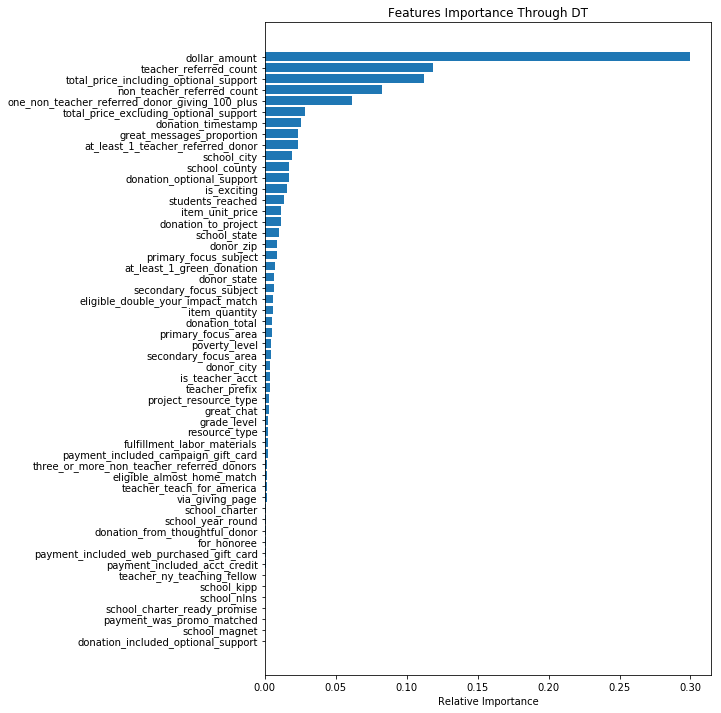

In [15]:
def sort_features_through_dt(df_features, df_label):
    features = df_features.columns
    model = DecisionTreeClassifier()
    model.fit(df_features, df_label)
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    plt.figure(figsize=(8, 12))
    plt.barh(padding, importances[sorted_idx], align='center')
    plt.yticks(padding, np.asarray(features)[sorted_idx])
    plt.xlabel("Relative Importance")
    plt.title("Features Importance Through DT")
    
    return list(np.asarray(features)[sorted_idx][::-1])

df['fully_funded'] = df['fully_funded'].astype('int')
all_x= df.drop(['date_posted', 'fully_funded'], axis=1)
all_y = df['fully_funded']

sorted_train_features = sort_features_through_dt(all_x, all_y)

In [16]:
# Select top 1/3 features
count = int(len(sorted_train_features) * 0.33)
all_x = all_x[sorted_train_features[:count]]
all_x.head()

,dollar_amount,teacher_referred_count,total_price_including_optional_support,non_teacher_referred_count,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,donation_timestamp,great_messages_proportion,at_least_1_teacher_referred_donor,school_city,school_county,donation_optional_support,is_exciting,students_reached,item_unit_price,donation_to_project,school_state
projectid,,,,,,,,,,,,,,,,,
fd89f34343ac2db84022f0f280f1e0c0,2,0.0,799.37,88.0,0.0,655.48,28765,64.000000,0.0,3480,315,0.90,0.0,250.0,92.69,4.10,10
e744e73ec071ab6720bd8be28558b894,1,1.0,548.60,9.0,1.0,466.31,154823,85.000000,1.0,4108,1054,3.00,1.0,12.0,29.99,17.00,46
cd1c17520724fe12e7a25d34fe4a8dd7,0,0.0,580.49,2.0,1.0,476.00,6355,56.287353,0.0,2072,11,15.00,0.0,35.0,79.99,85.00,4
0d30f2368ddb83f84051231b17fbec9f,1,1.0,412.71,6.0,1.0,350.80,54012,85.000000,1.0,4335,118,7.50,1.0,19.0,4.52,42.50,44
fa37cb4b8ca2dcfe73b7fde08ac00f1c,1,0.0,450.58,10.0,1.0,382.99,61515,0.000000,0.0,520,569,3.04,0.0,18.0,109.00,17.25,9


# Split Train and Test Set
## construct test window

In [17]:
def norm(df_features):
    # normalize
    df_features = preprocessing.MinMaxScaler().fit_transform(df_features)
    df_features = preprocessing.normalize(df_features, norm='max')
    return df_features

def build_test_window(df):
    dataset = []
    name = 'date_posted'
    label_name = 'fully_funded'
    start, end = 2002, 2012
    for year in range(start, end):
        test_year = start + 3
        df_left = df[(df[name] >= '{}-01-01'.format(start)) & (df[name] <= '{}-12-31'.format(start+2))]
        y_train = df_left[label_name]
        x_train = df_left[all_x.columns]
        
        df_right = df[(df[name] >= '{}-01-01'.format(test_year)) & (df[name] <= '{}-12-31'.format(test_year))]
        y_test = df_right[label_name]
        x_test = df_right[all_x.columns]
        
        # normalization
        x_train = norm(x_train)
        x_test = norm(x_test)
        dataset.append((x_train, y_train, x_test, y_test))
    return dataset


dataset = build_test_window(df)
print("has construct {} test window, every three years'data as one".format(len(dataset)))
dataset[0][0][:5]

has construct 10 test window, every three years'data as one


array([[  3.33333333e-01,   0.00000000e+00,   5.51449998e-04,
          1.24223602e-02,   1.00000000e+00,   5.51450000e-04,
          1.05581708e-01,   0.00000000e+00,   0.00000000e+00,
          6.70064175e-02,   4.81180812e-01,   9.89583333e-02,
          0.00000000e+00,   0.00000000e+00,   8.94127241e-02,
          1.16587678e-01,   1.00000000e+00],
       [  6.66666667e-01,   0.00000000e+00,   8.24099997e-05,
          6.21118012e-03,   0.00000000e+00,   8.24100000e-05,
          8.80968393e-02,   0.00000000e+00,   0.00000000e+00,
          6.13250283e-01,   6.45756458e-01,   2.86458333e-02,
          0.00000000e+00,   0.00000000e+00,   1.46554718e-02,
          3.55450237e-02,   1.00000000e+00],
       [  3.33333333e-01,   0.00000000e+00,   3.60898399e-04,
          6.21118012e-03,   1.00000000e+00,   3.60900000e-04,
          1.98386012e-01,   0.00000000e+00,   0.00000000e+00,
          6.70064175e-02,   4.81180812e-01,   1.40625000e-01,
          0.00000000e+00,   2.50000000e-02

# Build Classifier

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_recall_curve, roc_auc_score, roc_curve, auc,
                             precision_score, recall_score, f1_score)

In [19]:
classifier_constructors = {
    'LR': LogisticRegression,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'SVM': SVC,
    'RF': RandomForestClassifier,
    'GB': GradientBoostingClassifier,
    'BG': BaggingClassifier
}

grid = dict()
grid['LR'] = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001 * (10**i) for i in range(5)]
}
grid['DT'] = {
    'max_depth': [1, 20, 50],
    'criterion': ['gini', 'entropy']
}
grid['KNN'] = {
    'n_neighbors': [1, 5, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
grid['SVM'] = {
    'C': [0.1, 0.5, 1],
    'gamma': [1e-3, 1e-4],
    'kernel': ['rbf', 'linear']
}
grid['RF'] = {
    'n_estimators': [1, 5, 10],
    'max_depth': [1, 5, 10], 
    'max_features': ['sqrt', 'log2']
}
grid['GB'] = {
    'n_estimators': [1, 5, 10],
    'learning_rate' : [0.1, 0.5]
}
grid['BG'] = {
    'n_estimators': [1, 5, 10],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

## temporal validation
- Use test data to validate directly.
- KFold cross validation is not suitable for this problem, because this full_funded dataset has a time component.
- Use f1-score to find the best params.

In [20]:
import warnings
warnings.filterwarnings('ignore')

def classify(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    y_pre = clf.predict(x_test)
    return f1_score(y_test, y_pre)

def select_best_parameters(x_train, y_train, x_test, y_test):
    # iter three times
    number = 3
    # store all the scores and parameters
    classifiers = {}
    results = {}
    for k, clf_constructor in classifier_constructors.items():
        results[k] = []
        params = grid[k]
        for p in ParameterGrid(params):
            clf = clf_constructor(**p)
            f1_scores = [classify(x_train, y_train, x_test, y_test, clf) for i in range(number)]
            f1_score_mean = sum(f1_scores) / len(f1_scores)
            results[k].append((p, f1_score_mean))
    return results

all_best = {}
for x_train, y_train, x_test, y_test in dataset:
    results = select_best_parameters(x_train, y_train, x_test, y_test)
    for k, p_list in results.items():
        p = max(p_list, key=lambda x: x[1])
        if k not in all_best:
            all_best[k] = [p]
        else:
            all_best[k].append(p)

# print last 3 window value
for k, p in all_best.items():
    print(k)
    print('train: 2009-2011, test: 2012', p[-3])
    print('train: 2010-2012, test: 2013', p[-2])
    print('train: 2011-2013, test: 2014', p[-1])

LR
train: 2009-2011, test: 2012 ({'C': 1.0, 'penalty': 'l2'}, 0.97082847141190198)
train: 2010-2012, test: 2013 ({'C': 1.0, 'penalty': 'l2'}, 0.97082847141190198)
train: 2011-2013, test: 2014 ({'C': 1.0, 'penalty': 'l2'}, 0.97082847141190198)
KNN
train: 2009-2011, test: 2012 ({'algorithm': 'auto', 'n_neighbors': 10}, 0.97082847141190198)
train: 2010-2012, test: 2013 ({'algorithm': 'auto', 'n_neighbors': 10}, 0.97082847141190198)
train: 2011-2013, test: 2014 ({'algorithm': 'auto', 'n_neighbors': 10}, 0.97082847141190198)
DT
train: 2009-2011, test: 2012 ({'criterion': 'gini', 'max_depth': 1}, 0.97082847141190198)
train: 2010-2012, test: 2013 ({'criterion': 'gini', 'max_depth': 1}, 0.97082847141190198)
train: 2011-2013, test: 2014 ({'criterion': 'gini', 'max_depth': 1}, 0.97082847141190198)
SVM
train: 2009-2011, test: 2012 ({'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}, 0.97082847141190198)
train: 2010-2012, test: 2013 ({'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}, 0.97082847141190198)

As we see, when years changes, the best parameters doesn't change almostly.
So we can use 2011-2013/2014 data to evaluate the classifier

# Evaluate Classifier
## Calculate precision, recall, f1, and auc

In [21]:
# evalute metrics
def evaluate_classifier(y_test, y_pre, y_prob, cost_time=0):
    return {
        'precision': float("%.4f" % precision_score(y_test, y_pre)),
        'recall': float("%.4f" % recall_score(y_test, y_pre)),
        'f1': float("%.4f" % f1_score(y_test, y_pre)),
        'auc': float("%.4f" % roc_auc_score(y_test, y_prob)),
        'cost_time': float("%.4f" % cost_time)
    }

def evaluate_classifiers(X_test, y_test, threshold):
    metrics = dict()
    probas = dict()
    for k, clf in classifiers.items():
        start = time.time()
        if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
        else:
            y_prob = clf.decision_function(X_test)
        y_pre = np.asarray([1 if run >= threshold else 0 for run in y_prob])
        cost_time = time.time() - start
        metrics[k] = evaluate_classifier(y_test, y_pre, y_prob, cost_time)
        probas[k] = y_prob
    return metrics, probas
        
# we use 2011-2013 data for train, 2014 data for test
classifiers = {}
x_train, y_train, x_test, y_test = dataset[-1]

for k, p in all_best.items():
    clf = classifier_constructors[k](**p[-1][0])
    clf.fit(x_train, y_train)
    classifiers[k] = clf

metrics, probas = evaluate_classifiers(x_test, y_test, 0.05)
metrics

{'BG': {'auc': 0.8902,
  'cost_time': 0.0009,
  'f1': 0.9075,
  'precision': 0.8323,
  'recall': 0.9976},
 'DT': {'auc': 0.8931,
  'cost_time': 0.0003,
  'f1': 0.8837,
  'precision': 0.7917,
  'recall': 1.0},
 'GB': {'auc': 0.1067,
  'cost_time': 0.0003,
  'f1': 0.8837,
  'precision': 0.7917,
  'recall': 1.0},
 'KNN': {'auc': 0.8853,
  'cost_time': 0.0066,
  'f1': 0.8837,
  'precision': 0.7917,
  'recall': 1.0},
 'LR': {'auc': 0.9539,
  'cost_time': 0.0003,
  'f1': 0.8837,
  'precision': 0.7917,
  'recall': 1.0},
 'RF': {'auc': 0.8848,
  'cost_time': 0.0012,
  'f1': 0.8837,
  'precision': 0.7917,
  'recall': 1.0},
 'SVM': {'auc': 0.8708,
  'cost_time': 0.0017,
  'f1': 0.9708,
  'precision': 0.9476,
  'recall': 0.9952}}

## Draw AUC

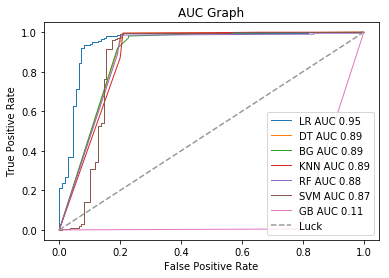

In [22]:
def draw_auc(probas, y_test):
    plt.clf()
    auc_list = []
    for k, prob in probas.items():
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        roc_auc = auc(fpr, tpr)
        auc_list.append((k, roc_auc))
        
    auc_list.sort(key=lambda x: x[1], reverse=True)
    
    for k, roc_auc in auc_list:
        fpr, tpr, thresholds = roc_curve(y_test, probas[k])
        plt.plot(fpr, tpr, lw=1, label=('%s AUC %.2f' % (k, roc_auc)))
    
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Graph')
    plt.legend(loc="lower right")

draw_auc(probas, y_test)

## Draw Precision-Recall Curves

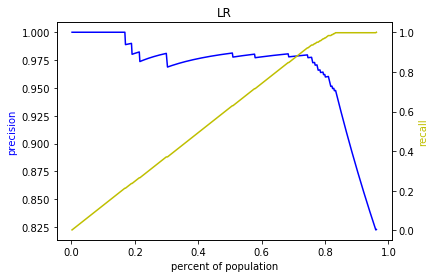

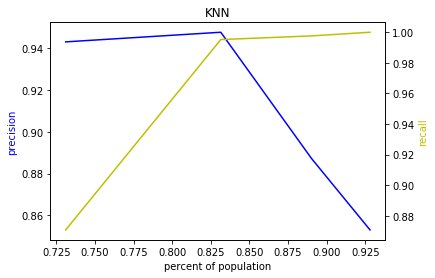

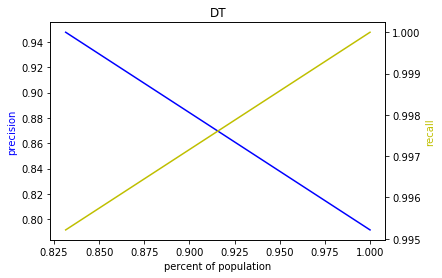

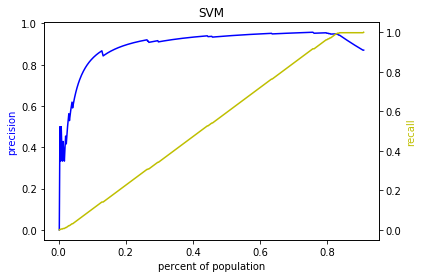

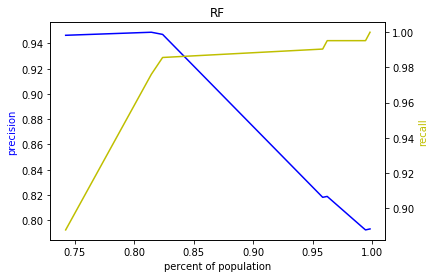

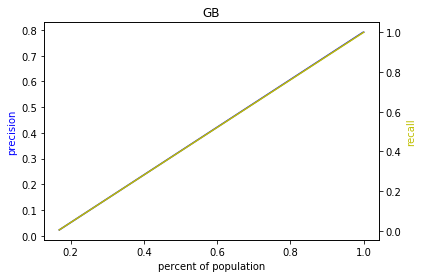

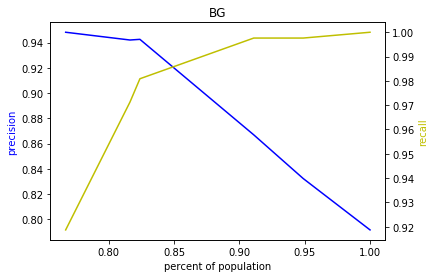

In [23]:
def plot_precision_recall(y_test, key):
    plt.clf()
    y_prob = probas[key]
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_prob)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_per_thresh = []
    number_scored = len(y_prob)
    for value in pr_thresholds:
        num_above_thresh = len(y_prob[y_prob >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_per_thresh.append(pct_above_thresh)
    pct_per_thresh = np.array(pct_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_per_thresh, recall_curve, 'y')
    ax2.set_ylabel('recall', color='y')
    plt.title(key)
    plt.show()
    
for key in probas.keys():
    plot_precision_recall(y_test, key)

## Draw Precision, Recall, Auc and F1

In [24]:
data = dict()
data['key'] =  ['precision', 'recall', 'f1', 'auc', 'cost_time']

for k, metric in metrics.items():
    data[k] = [metric[item] for item in data['key']]

df_result = pd.DataFrame(data)

df_result = df_result.set_index('key')
df_result.head()

,BG,DT,GB,KNN,LR,RF,SVM
key,,,,,,,
precision,0.8323,0.7917,0.7917,0.7917,0.7917,0.7917,0.9476
recall,0.9976,1.0000,1.0000,1.0000,1.0000,1.0000,0.9952
f1,0.9075,0.8837,0.8837,0.8837,0.8837,0.8837,0.9708
auc,0.8902,0.8931,0.1067,0.8853,0.9539,0.8848,0.8708
cost_time,0.0009,0.0003,0.0003,0.0066,0.0003,0.0012,0.0017


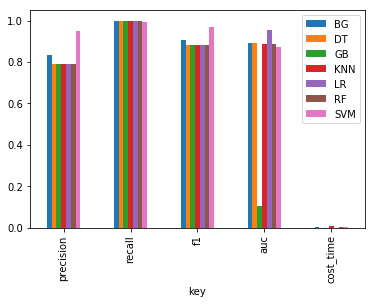

In [25]:
df_result.plot.bar();
plt.show()

## The Best Classifier

In [26]:
# find the best one
def find_the_best_model(target='auc'):
    metrics_list = list(metrics.items())
    metrics_list.sort(key=lambda x: x[1][target], reverse=True)
    return metrics_list[0]

best = find_the_best_model('precision')
best

('SVM',
 {'auc': 0.8708,
  'cost_time': 0.0017,
  'f1': 0.9708,
  'precision': 0.9476,
  'recall': 0.9952})

In [27]:
def get_baseline_metric():
    base_clf = DummyClassifier()
    base_clf.fit(x_train, y_train)
    start = time.time()
    y_pre = base_clf.predict(x_test)
    cost_time = time.time() - start
    y_prob = base_clf.predict_proba(x_test)[:, 1]
    return evaluate_classifier(y_test, y_pre, y_prob, cost_time)

baseline_metric = get_baseline_metric()
('Baseline', baseline_metric)

('Baseline',
 {'auc': 0.5297,
  'cost_time': 0.0003,
  'f1': 0.8646,
  'precision': 0.7901,
  'recall': 0.9545})

## Compare to Baseline

In [28]:
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]
threshold_metrics = {}
for threshold in thresholds:
    threshold_metrics[str(threshold)] = evaluate_classifiers(x_test, y_test, threshold)[0]  

In [29]:
data = dict()
data['key'] =  ['best-%s' % item for item in thresholds] + ['baseline']

for k in ['recall', 'f1', 'auc', 'precision', 'cost_time']:
    data[k] = [threshold_metrics[str(threshold)][best[0]][k] for threshold in thresholds]
    data[k].append(baseline_metric[k])

    
df_result = pd.DataFrame(data)
df_result = df_result.set_index('key')
df_result = df_result.sort_values(by='precision')[::-1]
df_result.head(10)

,auc,cost_time,f1,precision,recall
key,,,,,
best-0.5,0.8708,0.0008,0.9708,0.9476,0.9952
best-0.3,0.8708,0.0008,0.9708,0.9476,0.9952
best-0.2,0.8708,0.0008,0.9708,0.9476,0.9952
best-0.1,0.8708,0.0007,0.9708,0.9476,0.9952
best-0.05,0.8708,0.0007,0.9708,0.9476,0.9952
best-0.02,0.8708,0.0007,0.9708,0.9476,0.9952
best-0.01,0.8708,0.0008,0.9708,0.9476,0.9952
baseline,0.5297,0.0003,0.8646,0.7901,0.9545


As we see, when threshold equals 0.5, the classifier perform best. But baseline classifier cost the least.